# Preparation


In [2]:
import os
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model


In [3]:
# dotenv
try:
    from dotenv import load_dotenv
except ModuleNotFoundError:
    !pip install python-dotenv
    from dotenv import load_dotenv
load_dotenv()


True

In [ ]:
DRIVE_DIR = os.environ.get('DRIVE_DIR', '')


In [ ]:
is_colab = False
try:
    from google.colab import drive
    drive.mount('/content/drive')
    is_colab = True
    Path(DRIVE_DIR).mkdir(parents=True, exist_ok=True)
except:
    pass


Mounted at /content/drive


# Prediction


In [4]:
width = 200
height = 200
depth = 3
target_size = (width, height)


In [5]:
def preprocess_image(img_path, color_mode='rgb', target_size=(256, 256)):
    img = tf.keras.utils.load_img(
        img_path, color_mode=color_mode, target_size=target_size)
    img = tf.keras.utils.img_to_array(img)
    return img


In [9]:
classes = ['Corn__Corn___Common_Rust',
           'Corn__Corn___Gray_Leaf_Spot',
           'Corn__Corn___Healthy',
           'Corn__Corn___Northern_Leaf_Blight',
           'Potato__Potato___Early_Blight',
           'Potato__Potato___Healthy',
           'Potato__Potato___Late_Blight',
           'Rice__Rice___Brown_Spot',
           'Rice__Rice___Healthy',
           'Rice__Rice___Leaf_Blast',
           'Rice__Rice___Neck_Blast',
           'Wheat__Wheat___Brown_Rust',
           'Wheat__Wheat___Healthy',
           'Wheat__Wheat___Yellow_Rust']


In [10]:
MODEL_PATH = os.path.join(DRIVE_DIR, 'crops_diseases.h5')
model = load_model(MODEL_PATH)


Metal device set to: Apple M1

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2022-07-31 19:17:30.555540: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-07-31 19:17:30.555648: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


1/1 [==============================] - 0s 45ms/step


Text(0.5, 1, '[[1.4438166e-03 1.3375398e-03 1.1140017e-03 1.7851127e-03 6.0719816e-04\n  2.8157778e-04 7.2316977e-04 1.0417484e-03 2.4823146e-03 2.9324666e-03\n  8.7551516e-04 9.8057050e-01 2.5548716e-03 2.2501815e-03]]')

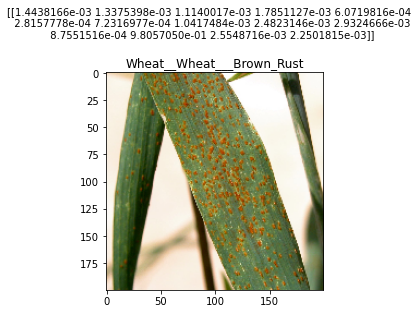

In [20]:
test_image = 'wheat_leaf_rust_pustule.jpg.png'
img = preprocess_image(test_image, target_size=target_size)/255
img = np.expand_dims(img, axis=0)
result = model.predict(img)
plt.imshow(np.squeeze(img))
plt.title(classes[np.argmax(result)])
plt.figtext(0.5, 1, result, ha="center")
